In [6]:
import glob

In [7]:
'''
Datasets:
1. data/ resized documents
2. big_data/ documents after pdf2image
'''
PATH = "nuevo_pdf/"
images = (glob.glob(PATH + "*.png") + glob.glob(PATH + "*.jpg") + glob.glob(PATH + "*.jpeg"))
images.sort()

analyze_front_page = '0'
analyze_back_page = '1'

#Comment if you want to analyze both
images = [image for image in images if analyze_back_page in image]
print(images)

['nuevo_pdf/1+CAguilarA.png', 'nuevo_pdf/1+CAraujoA.png', 'nuevo_pdf/1+CCarrancoA.png', 'nuevo_pdf/1+CCerdaA.png', 'nuevo_pdf/1+CCosmeA.png', 'nuevo_pdf/1+CCreixellA.png', 'nuevo_pdf/1+CElizondoA.png', 'nuevo_pdf/1+CEspinosaA.png', 'nuevo_pdf/1+CGaonaA.png', 'nuevo_pdf/1+CGarciaA.png', 'nuevo_pdf/1+CGarduñoA.png', 'nuevo_pdf/1+CGomezA.png', 'nuevo_pdf/1+CLafontt.png', 'nuevo_pdf/1+CMorenoA.png', 'nuevo_pdf/1+CPelayoA.png', 'nuevo_pdf/1+CRamosA.png', 'nuevo_pdf/1+CReyesA.png', 'nuevo_pdf/1+CRodriguezA.png', 'nuevo_pdf/1+CSanchezA.png', 'nuevo_pdf/1+CSebastianA.png', 'nuevo_pdf/1+CValadezA.png', 'nuevo_pdf/1+CValenciaA.png']


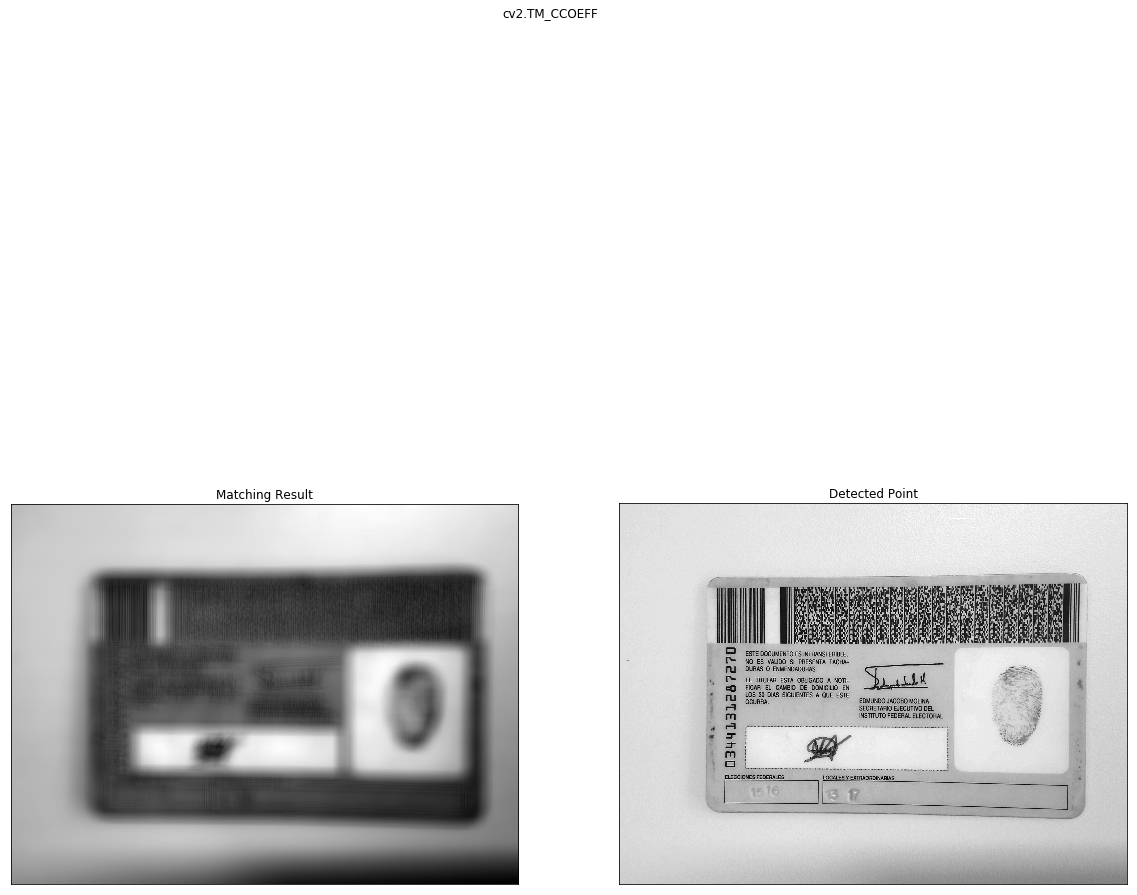

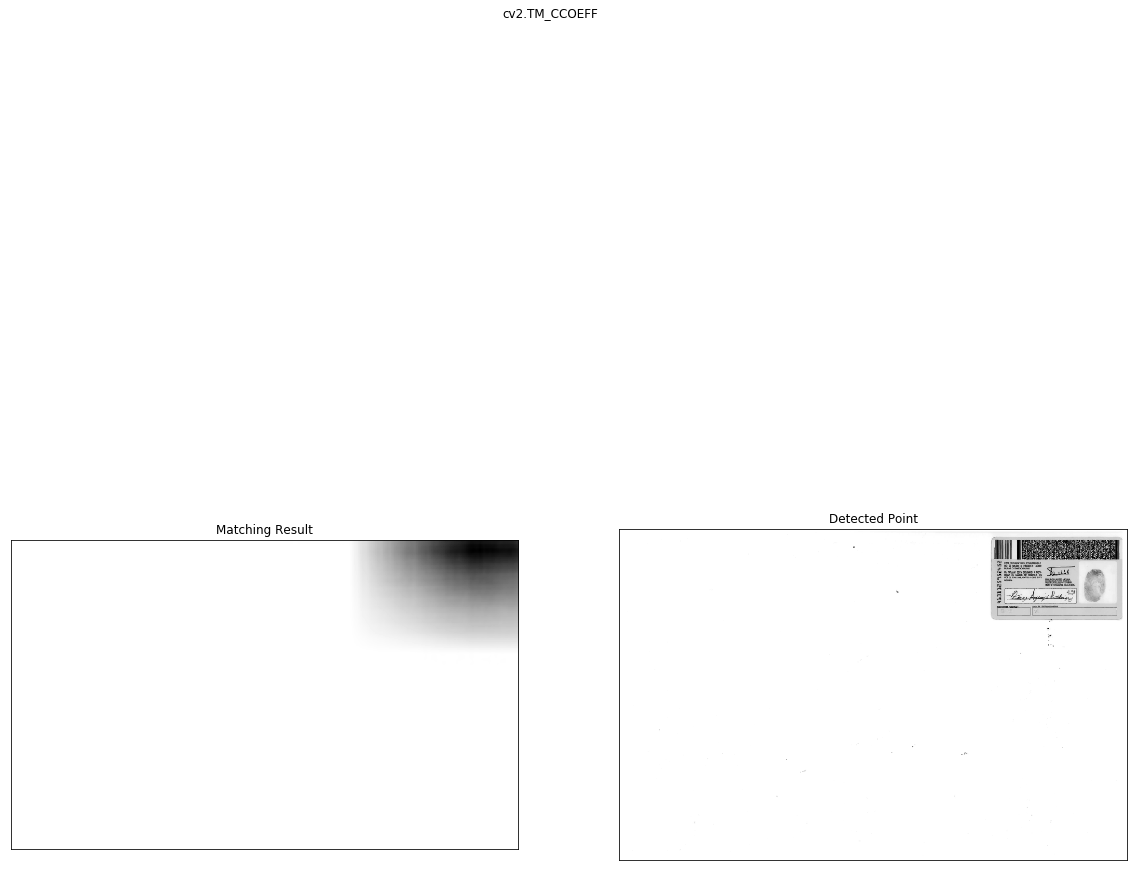

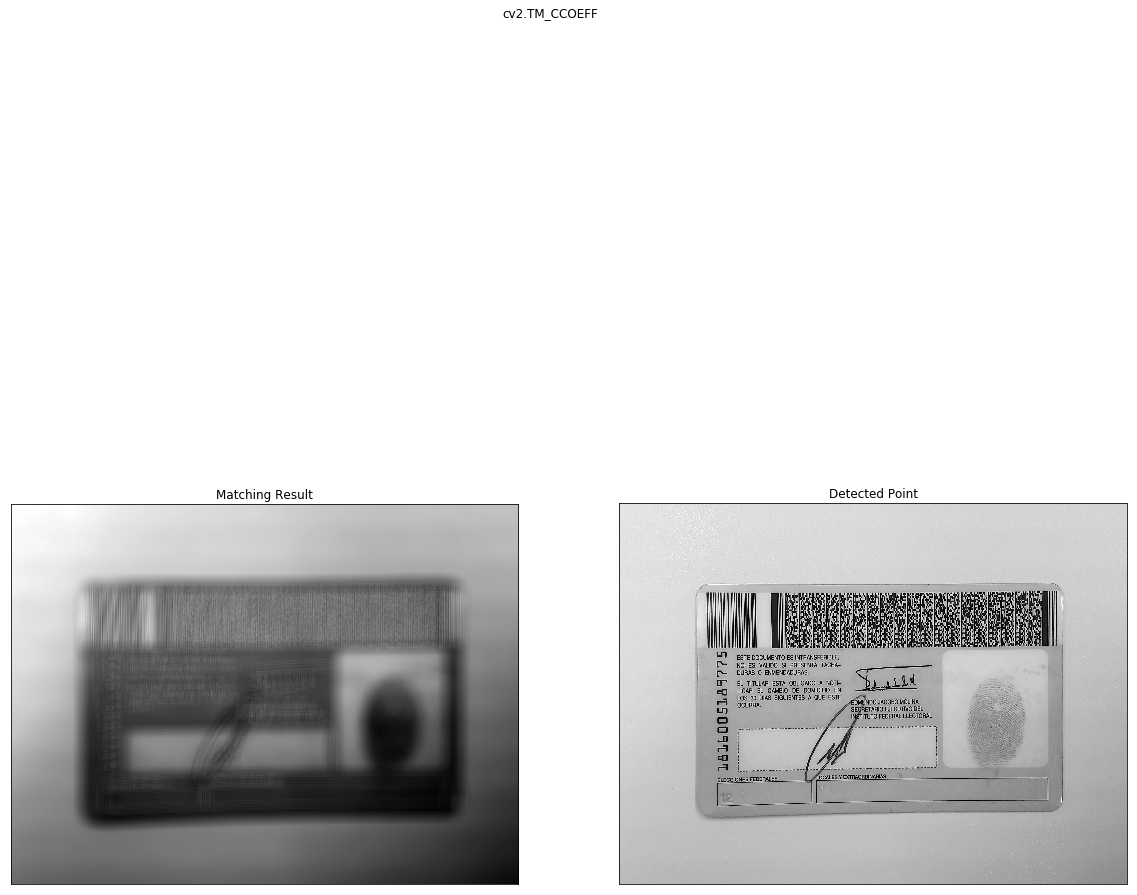

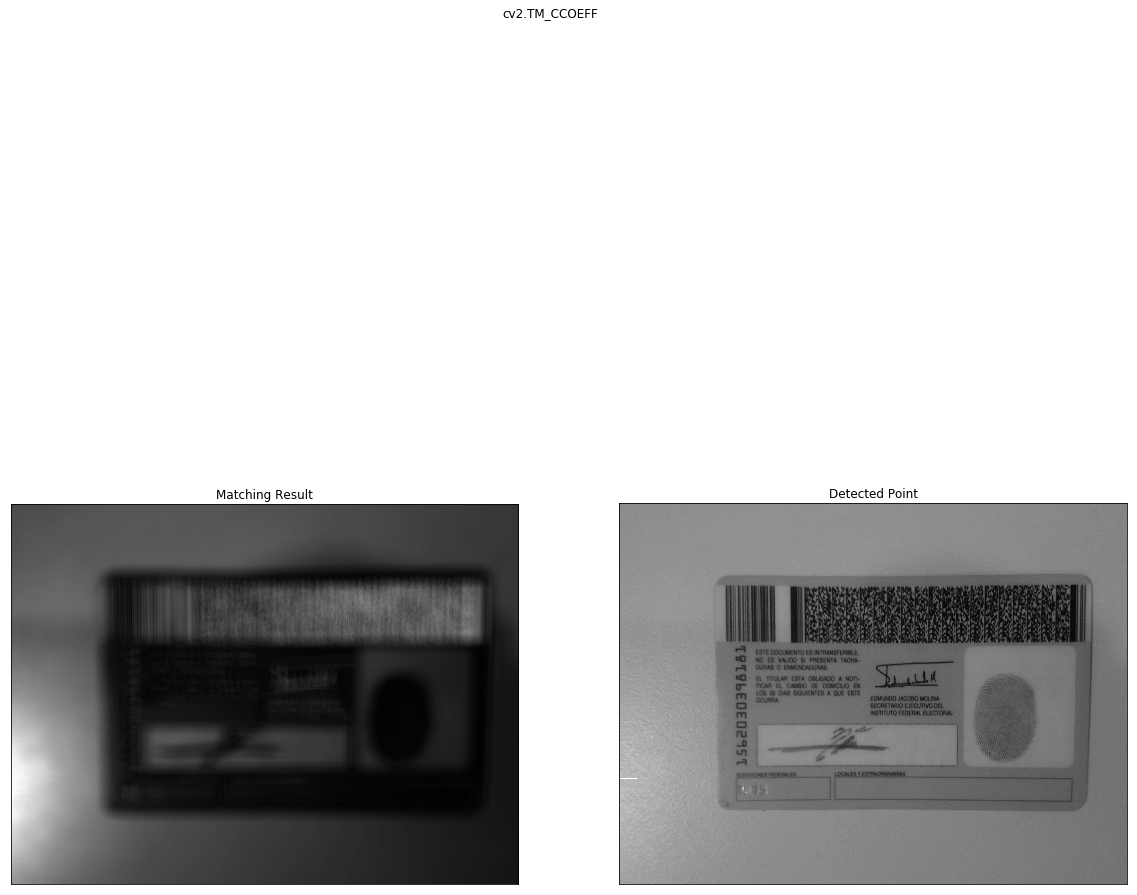

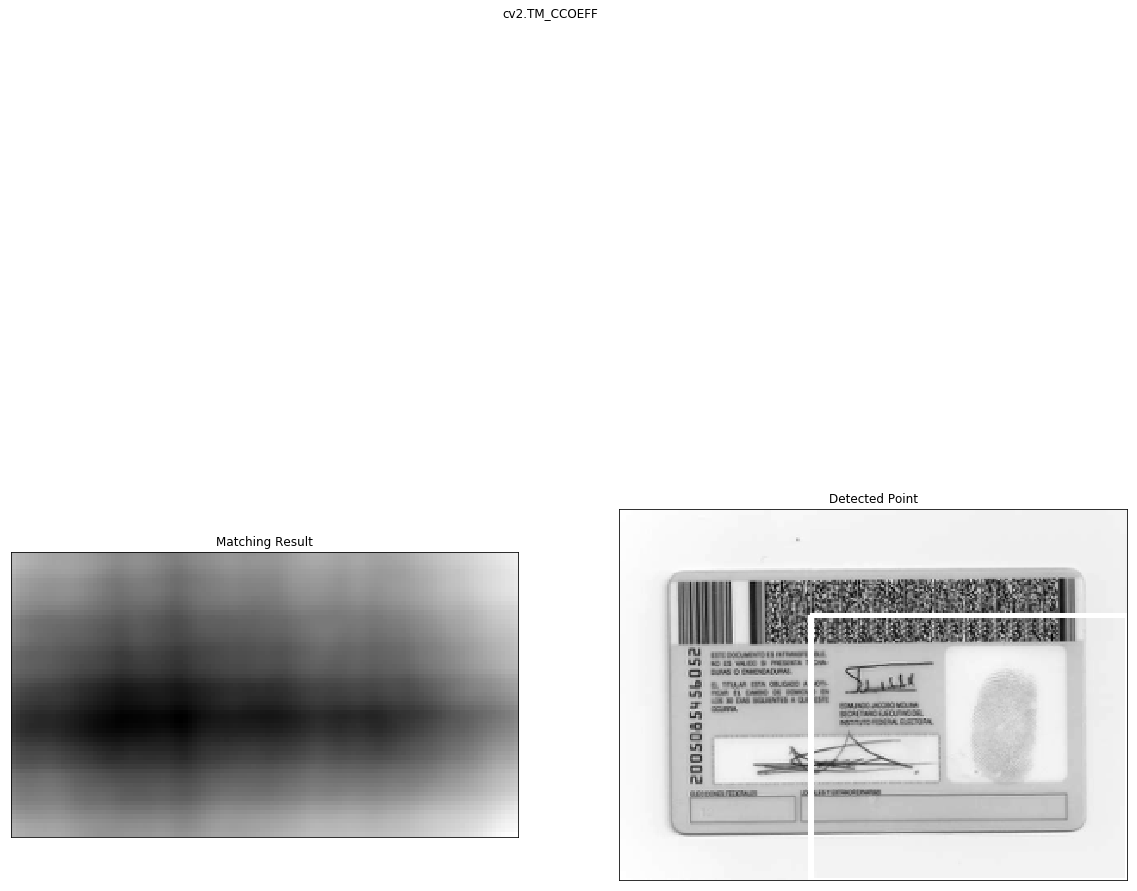

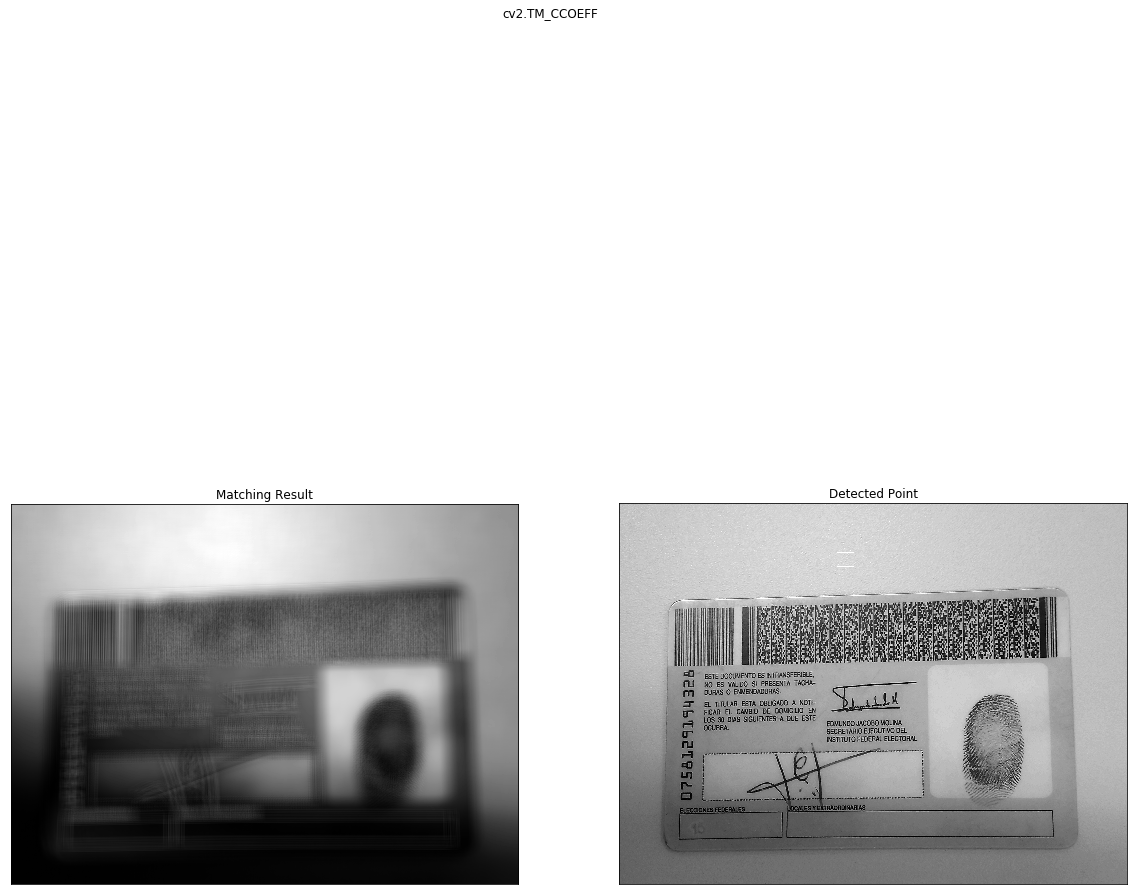

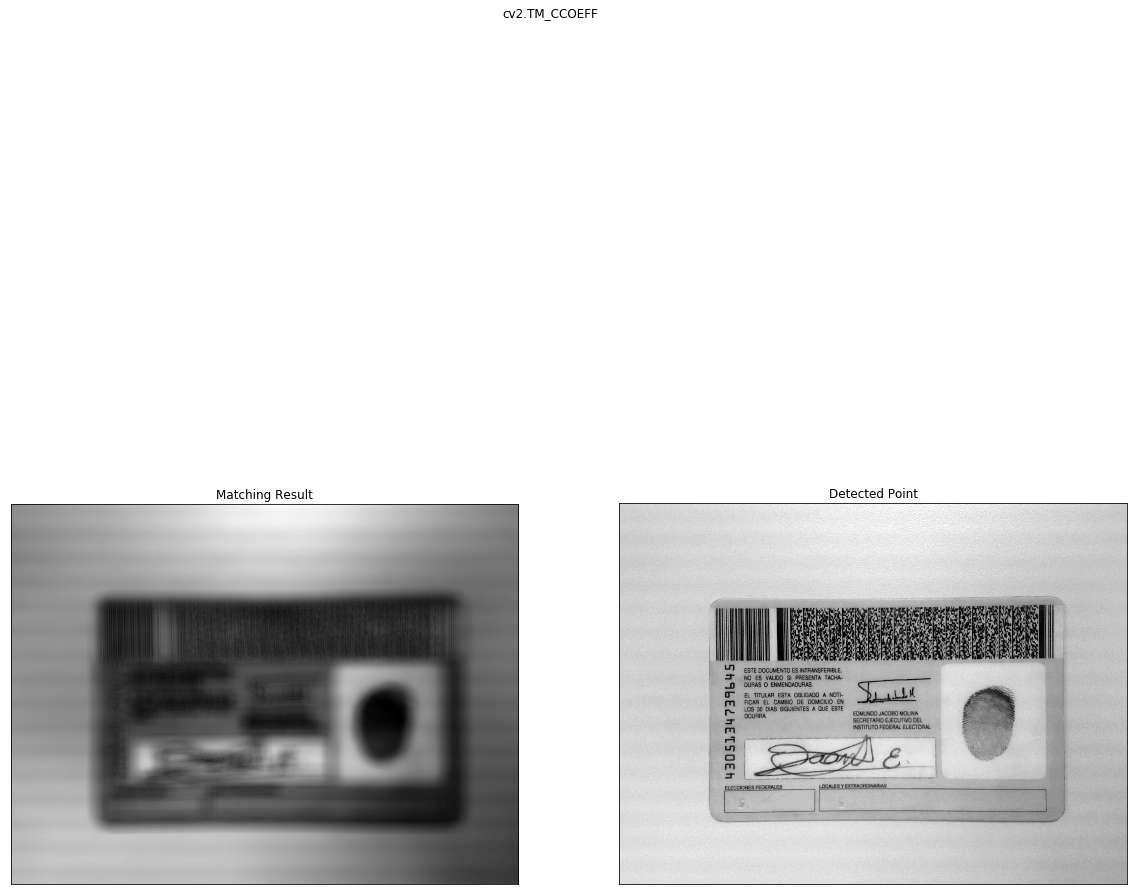

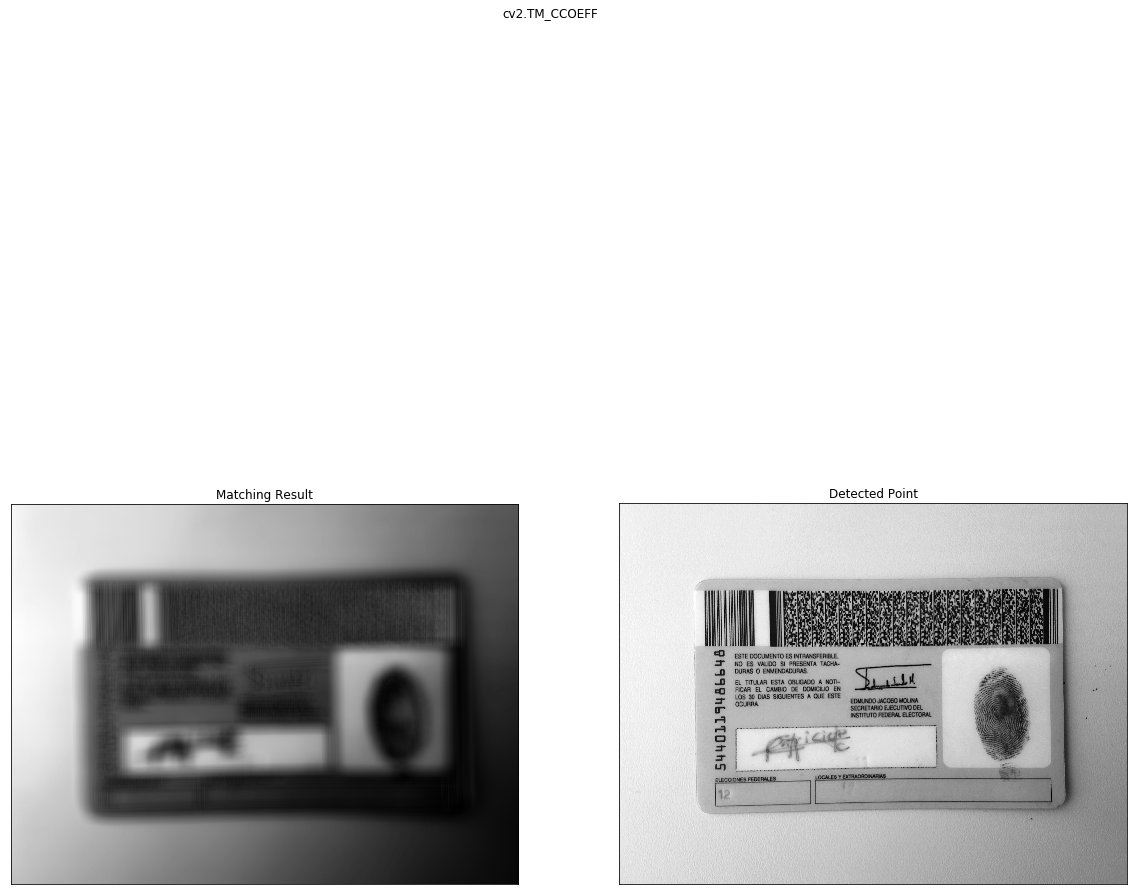

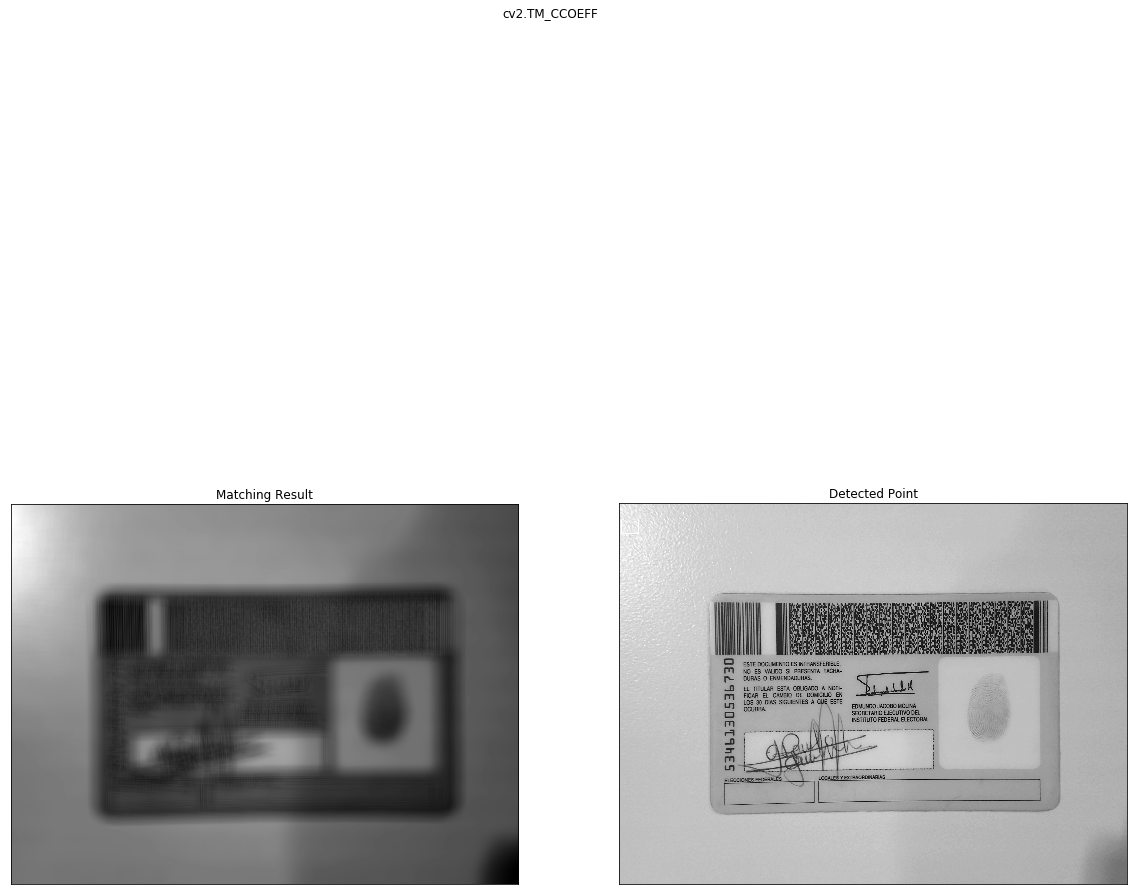

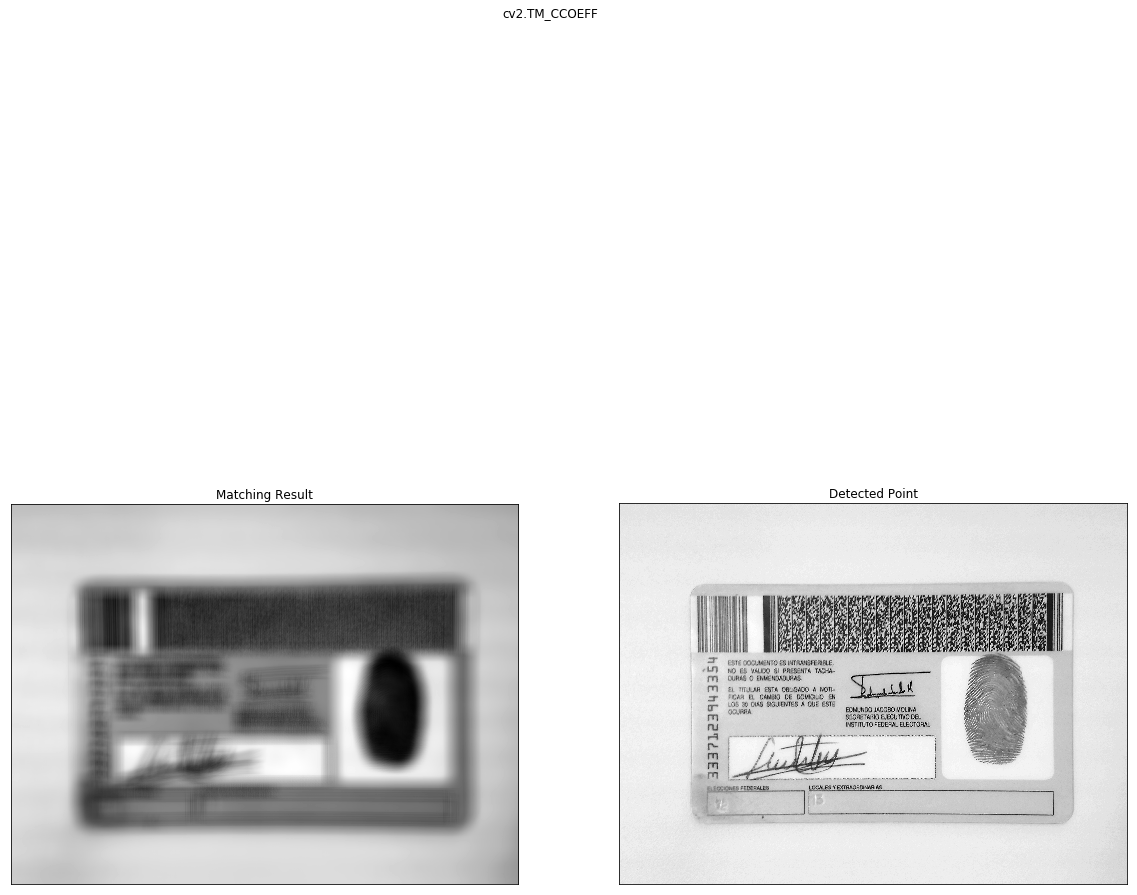

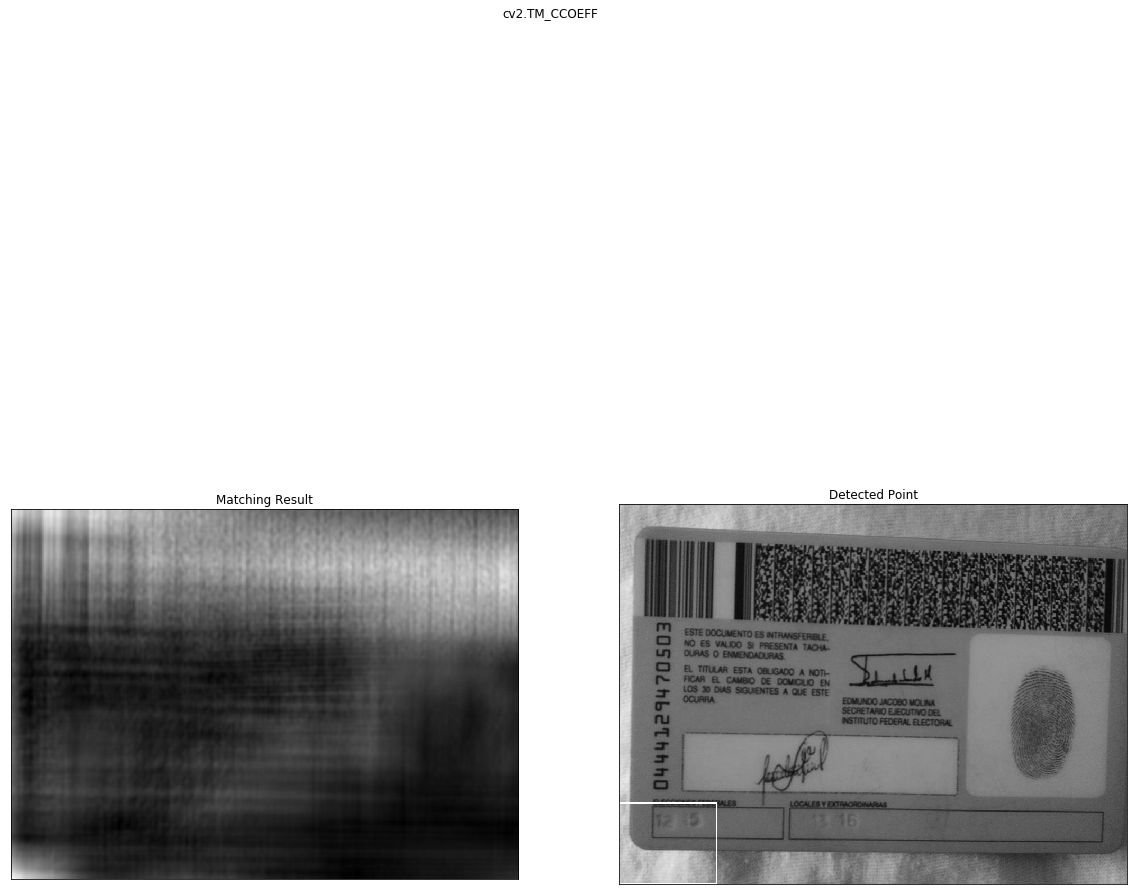

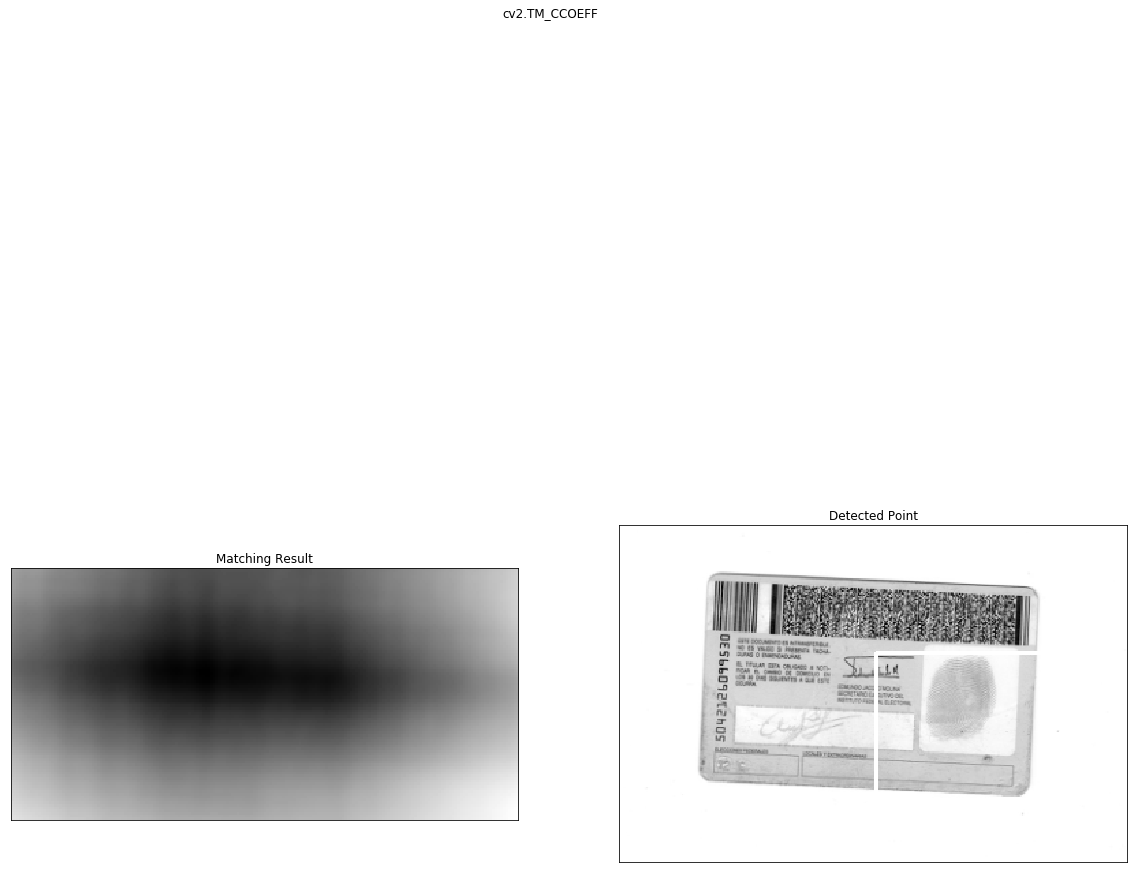

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt



# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for path in images:
    img = cv2.imread(path,0)
    img2 = img.copy()
    template = cv2.imread('pattern.png',0)
    w, h = template.shape[::-1]
    
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    
    plt.figure(figsize=(20, 20))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()